In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
items = pd.read_csv('input/items.csv')
shops = pd.read_csv('input/shops.csv')
categories = pd.read_csv('input/item_categories.csv')
sales = pd.read_csv('input/sales_train.csv')
submission = pd.read_csv('input/sample_submission.csv')
# set index to ID to avoid droping it later
test  = pd.read_csv('input/test.csv').set_index('ID')

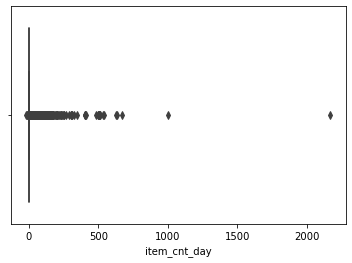

In [4]:
sns.boxplot(x=sales.item_cnt_day)

In [5]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


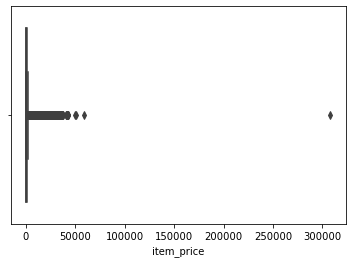

In [6]:
sns.boxplot(x=sales.item_price)

In [42]:
train = sales[(sales.item_price < 10000) & (sales.item_price > 0) ]
train = sales[sales.item_cnt_day < 1001]

In [43]:
(sales.item_price < 10000) & (sales.item_price > 0)

0          True
1          True
2          True
3          True
4          True
           ... 
2935844    True
2935845    True
2935846    True
2935847    True
2935848    True
Name: item_price, Length: 2935849, dtype: bool

In [47]:
train['item_price'].max()

307980.0

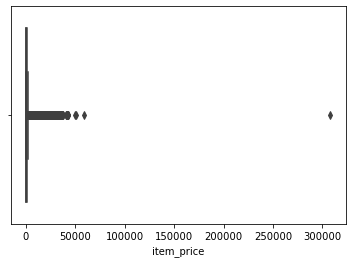

In [44]:
sns.boxplot(x=train.item_price)

In [25]:
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57

train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

train.loc[train.shop_id == 40, 'shop_id'] = 39
test.loc[test.shop_id == 40, 'shop_id'] = 39

In [26]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

df = [] 

In [34]:
sales['date_block_num']

0           0
1           0
2           0
3           0
4           0
           ..
2935844    33
2935845    33
2935846    33
2935847    33
2935848    33
Name: date_block_num, Length: 2935849, dtype: int64

In [28]:
for block_num in train['date_block_num'].unique():
#     print(block_num)
    cur_shops = train.loc[sales['date_block_num']==block_num]

0
57
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
